In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import cv2
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
sns.set()
from PIL import Image
from matplotlib import image
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical   
from sklearn.model_selection import train_test_split

In [2]:
# images = [cv2.imread(file) for file in glob.glob("\GTSRB\Training\00000\*.ppm")]
train_data_path = ".\dataset\Train.csv"
test_data_path = ".\dataset\Test.csv"
train_path = "dataset\Train"

train_data = pd.read_csv(train_data_path)

In [3]:
train_data["ClassId"]

0        20
1        20
2        20
3        20
4        20
5        20
6        20
7        20
8        20
9        20
10       20
11       20
12       20
13       20
14       20
15       20
16       20
17       20
18       20
19       20
20       20
21       20
22       20
23       20
24       20
25       20
26       20
27       20
28       20
29       20
         ..
39179    42
39180    42
39181    42
39182    42
39183    42
39184    42
39185    42
39186    42
39187    42
39188    42
39189    42
39190    42
39191    42
39192    42
39193    42
39194    42
39195    42
39196    42
39197    42
39198    42
39199    42
39200    42
39201    42
39202    42
39203    42
39204    42
39205    42
39206    42
39207    42
39208    42
Name: ClassId, Length: 39209, dtype: int64

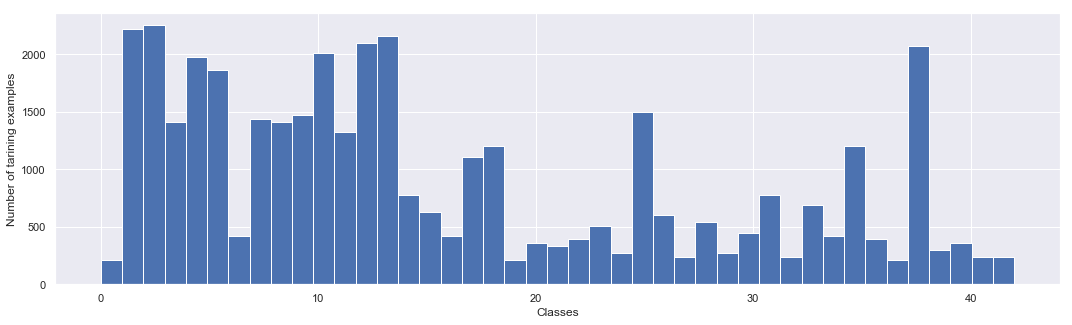

In [4]:
plt.figure(figsize=[18,5]);
plt.hist(train_data["ClassId"], bins=43, );
plt.ylabel("Number of tarining examples");
plt.xlabel("Classes");

In [5]:
train_data.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [6]:
train_data.keys()

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [7]:
train_data.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


#### Pre-processing
##### 1. Load image
##### 2. Resize image to 32* 32
##### 3. Convert to grayscale
##### 4. Eqilize image for better contrast
##### 5. Convert image between range [0 and 1]
##### 6. Convert labels to one-hot

In [8]:
img_dimentions = (32,32)
def pre_processing_(train_data):
    number_of_images = train_data.shape
    number_of_images[0]

    train_images = []

    for i in range(number_of_images[0]):
        img = cv2.imread("dataset/"+train_data.Path[i])
        img = cv2.resize(img, img_dimentions) # resizing images to 32 x 32 pixels
        img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert RBG images to grayscale
        img_equilize = cv2.equalizeHist(img_grayscale) # improve contrast
        img_scale = img_grayscale / 255.00

        train_images.append(img_scale)
    # One- hot encoding labels
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(train_data.ClassId)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    train_labels = onehot_encoder.fit_transform(integer_encoded)
    return np.array(train_images), train_labels

train_images, train_labels = pre_processing_(train_data)

D:\Installed_Softwares\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Augmentation
#### 1. Flip image horizontally

In [9]:
# # flipped images 
# flipped_images = []
# flipped_labels = []
# for i in range(train_images.shape[0]):
#     # for horizontally flippable images
#     if np.where(train_labels[i] == 1)[0][0] in horizontally_flippable:
#         flipped_images.append(cv2.flip(train_images[i], flipCode=1)) # horizontal flip
#         flipped_labels.append(train_labels[i])
#     flipped = len(flipped_images)
#     print(f"Number of images flipped horizontally: {flipped} and labels: {flipped}")
#     # for vertically flippable images
#     if np.where(train_labels[i] == 1)[0][0] in vertically_flippable:
#         flipped_images.append(cv2.flip(train_images[i], flipCode=0)) # vertical flip
#         flipped_labels.append(train_labels[i])
#     print(f"Number of images flipped vertically: {len(flipped_images) - flipped} and labels: {len(flipped_labels) - flipped}")
#     flipped = len(flipped_images)
#     # for both flippable images
#     if np.where(train_labels[i] == 1)[0][0] in both_flippable:
#         flipped_images.append(cv2.flip(train_images[i], flipCode=-1)) # both flip
#         flipped_labels.append(train_labels[i])
#     print(f"Number of images both flipped: {len(flipped_images) - flipped} and labels: {len(flipped_labels) - flipped}")
#     flipped = len(flipped_images)
#     if np.where(train_labels[i] == 1)[0][0] in horizontally_cross_flippable[:, 0]:
#         flipped_images.append(cv2.flip(train_images[i], flipCode=1)) # horizontally cross flip
#         flipped_labels.append(horizontally_cross_flippable[np.where(horizontally_cross_flippable[:,0] == np.where(train_labels[i] == 1)[0][0]) ,1]  )
#     print(f"Number of images cross flipped horizontally: {len(flipped_images) - flipped} and labels: {len(flipped_labels) - flipped}")
#     flipped = len(flipped_images)
# print(f"Number of flipped images: {len(flipped_images)} and labels: {len(flipped_labels)}")

In [10]:
#     # Classes of signs that, when flipped horizontally, should still be classified as the same class
horizontally_flippable = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that, when flipped vertically, should still be classified as the same class
vertically_flippable = np.array([1, 5, 12, 15, 17])
# Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
both_flippable = np.array([32, 40])
# Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
horizontally_cross_flippable = np.array([
    [19, 20], 
    [33, 34], 
    [36, 37], 
    [38, 39],
    [20, 19], 
    [34, 33], 
    [37, 36], 
    [39, 38],   
])

# flipped images 
flipped_images = []
flipped_labels = []

## TODO: Optimize for loop
for i in range(train_images.shape[0]):
    # for horizontally flippable images
    if np.where(train_labels[i] == 1)[0][0] in horizontally_flippable:
        flipped_images.append(cv2.flip(train_images[i], flipCode=1)) # horizontal flip
        flipped_labels.append(train_labels[i])
#     print(type(train_labels[i]))
    
    # for vertically flippable images
    if np.where(train_labels[i] == 1)[0][0] in vertically_flippable:
        flipped_images.append(cv2.flip(train_images[i], flipCode=0)) # vertical flip
        flipped_labels.append(train_labels[i])
    # for both flippable images
    if np.where(train_labels[i] == 1)[0][0] in both_flippable:
        flipped_images.append(cv2.flip(train_images[i], flipCode=-1)) # both flip
        flipped_labels.append(train_labels[i])
    
    if np.where(train_labels[i] == 1)[0][0] in horizontally_cross_flippable[:, 0]:
        flipped_images.append(cv2.flip(train_images[i], flipCode=1)) # horizontally cross flip
        data_label = int(horizontally_cross_flippable[np.where(horizontally_cross_flippable[:,0] == np.where(train_labels[i] == 1)[0][0]) ,1])
        flipped_labels.append(to_categorical(data_label, num_classes=43))
print(f"Number of flipped images: {len(flipped_images)} and labels: {len(flipped_labels)}")

Number of flipped images: 24329 and labels: 24329


In [11]:
type(np.array(list(to_categorical(19, num_classes=43))))

numpy.ndarray

In [12]:
# Adding flipped images to original dataset
print(f"Number of original images: {len(train_images)} and original labels: {len(train_labels)}")
train_images = np.append(train_images, flipped_images, axis = 0)
# flipped_labels = np.array(flipped_labels)
train_labels = np.append(train_labels, flipped_labels, axis =0)
print(f"Number of total images: {len(train_images)} and total labels: {len(train_labels)}")
# train_images = train_images.append(flipped_images)


Number of original images: 39209 and original labels: 39209
Number of total images: 63538 and total labels: 63538


In [14]:
# np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
# X_val
train_images = np.reshape(train_images,(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))

In [17]:
x_train, x_test, y_train,  y_test = train_test_split(train_images, train_labels, test_size=0.30) 

In [18]:

# from tensorflow.keras import models, layers

# model = models.Sequential()
# model.add(layers.Conv2D(32, kernel_size = 5, activation = "relu", input_shape=(32,32,1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, kernel_size=5, activation = "relu", input_shape=(16,16,1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(43))

In [21]:
# Conv layer 1
from tensorflow.keras import models, layers
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, kernel_size=5, input_shape=(32,32,1), padding='same', activation='relu'))
conv_model.add(layers.MaxPool2D((2,2)))
#conv_model.add(Dropout(0.1))

# Conv layer 2
conv_model.add(layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'))
conv_model.add(layers.MaxPool2D(2,2))
#conv_model.add(Dropout(0.2))

# Conv layer 3
conv_model.add(layers.Conv2D(128, kernel_size=5, padding='same', activation='relu'))
conv_model.add(layers.MaxPool2D(2,2))
#conv_model.add(Dropout(0.3))

# Flatten
conv_model.add(layers.Flatten())
#conv_model.add(Dropout(0.5))

# Fully connected layer 1:
conv_model.add(layers.Dense(1024, activation='relu'))

# Output layer
conv_model.add(layers.Dense(43, activation='softmax'))

conv_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flat

In [23]:
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

conv_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 44476 samples, validate on 19062 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
44476/44476 [==============================] - 239s 5ms/sample - loss: 0.6918 - acc: 0.8109 - val_loss: 0.1373 - val_acc: 0.9558
Epoch 2/5
44476/44476 [==============================] - 242s 5ms/sample - loss: 0.0675 - acc: 0.9801 - val_loss: 0.0707 - val_acc: 0.9786
Epoch 3/5
44476/44476 [==============================] - 240s 5ms/sample - loss: 0.0405 - acc: 0.9880 - val_loss: 0.0406 - val_acc: 0.9887
Epoch 4/5
44476/44476 [==============================] - 241s 5ms/sample - loss: 0.0359 - acc: 0.9899 - val_loss: 0.0515 - val_acc: 0.9851
Epoch 5/5
44476/44476 [==============================] - 240s 5ms/sample - loss: 0.0253 - acc: 0.9928 - val_loss: 0.0571 - val_acc: 0.9849
